In [5]:
# Learning FT style. 

library(ggplot2)
library(dplyr,warn.conflicts = FALSE)
library(tidyr)
library(magrittr)
library(RColorBrewer)
library(scales)

In [6]:
allSeasons <- read.csv('https://raw.githubusercontent.com/johnburnmurdoch/johnburnmurdoch.github.io/master/slides/r-ggplot/changing-tides-of-football.csv', stringsAsFactors = F)
oneSeason <- allSeasons %>% filter(year==2016)

In [9]:
head(oneSeason)

club,score,year,country,n,rank,allRank,atb,atw,eb,ew,tenth
Arsenal,1831,2016,ENG,20,1,12,2031,1831,2097,1831,1834
ManCity,1826,2016,ENG,20,2,14,2020,1826,2041,1713,1834
Tottenham,1818,2016,ENG,20,3,15,1979,1793,1964,1694,1834
Chelsea,1808,2016,ENG,20,4,16,1946,1776,1873,1654,1834
ManUnited,1782,2016,ENG,20,5,20,1860,1738,1847,1641,1834
Leicester,1781,2016,ENG,20,6,21,1830,1710,1834,1634,1834


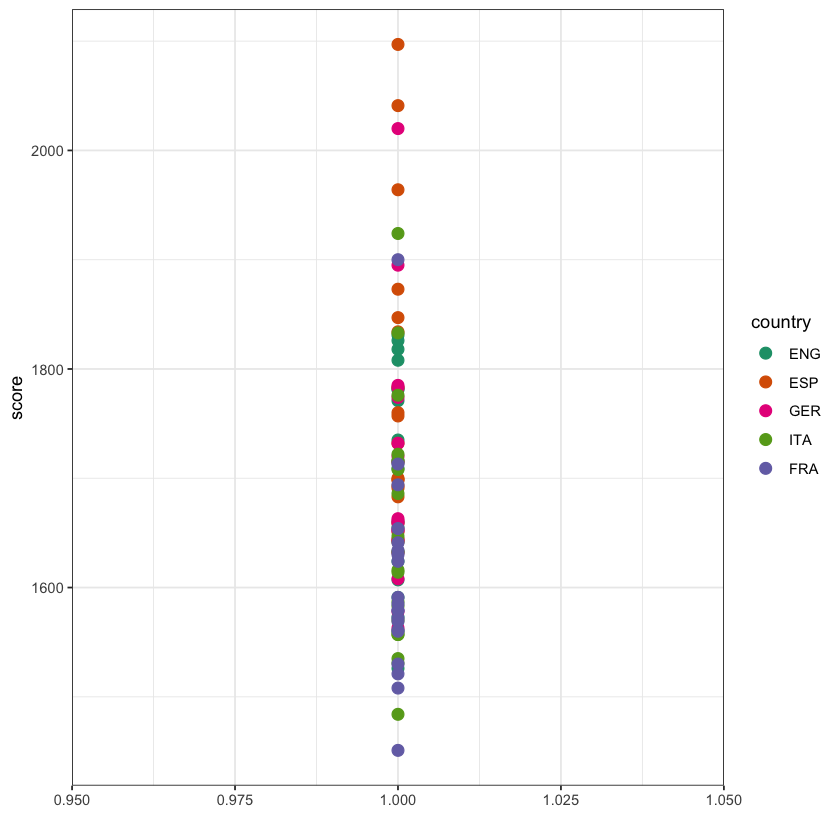

In [10]:
#1
ggplot(oneSeason
       ,aes(x=1,score,col=country)) + 
  geom_point(size=3) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="right", legend.direction="vertical") +
  xlab('')

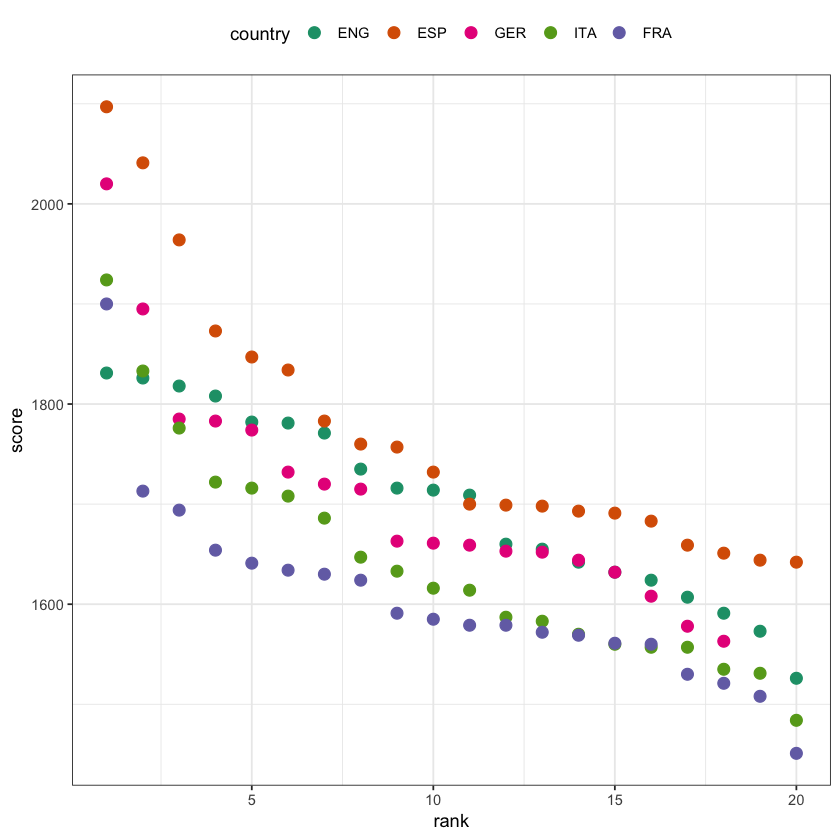

In [11]:
#2
ggplot(oneSeason
       ,aes(rank,score,col=country)) + 
  geom_point(size=3) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="top")

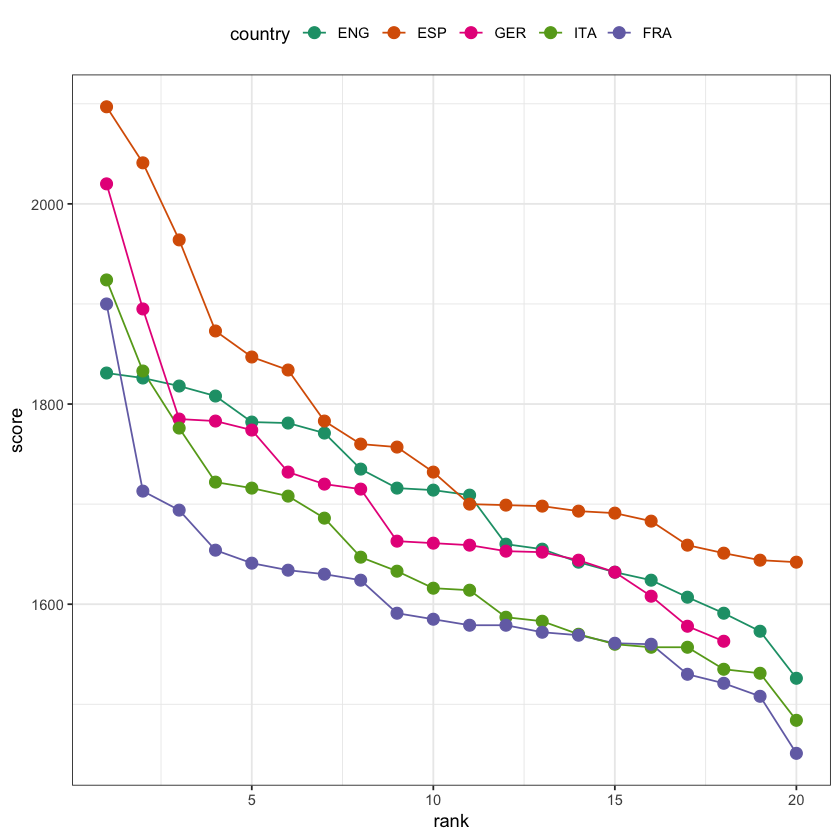

In [12]:
#3
ggplot(oneSeason
       ,aes(rank,score,col=country)) + 
  geom_path() + 
  geom_point(size=3) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="top")

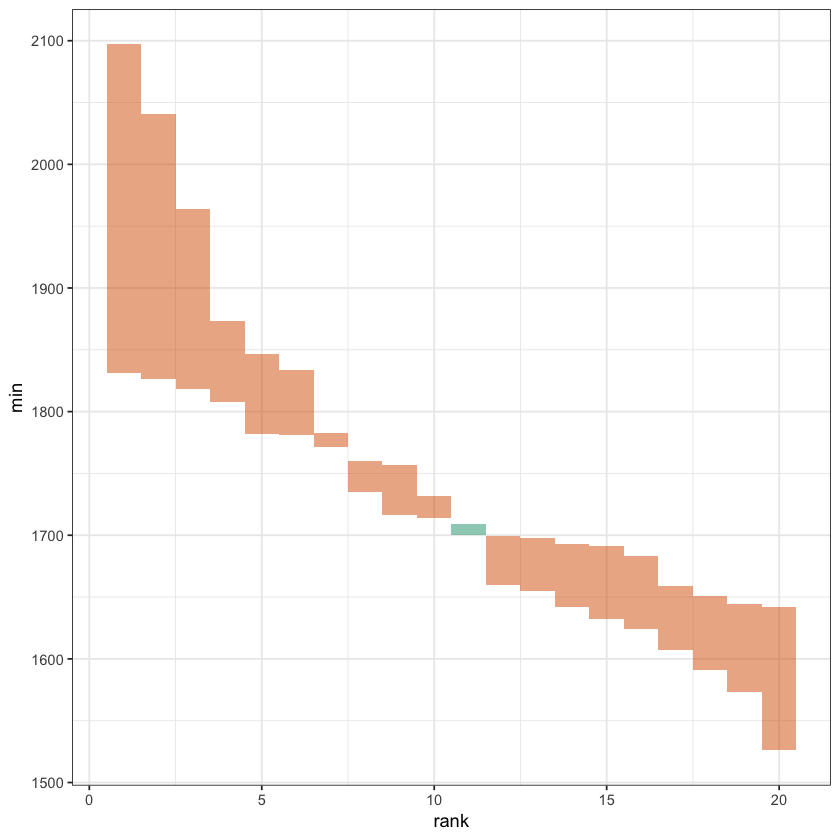

In [13]:
#4
ggplot(allSeasons %>%
         filter(year==2016 & country %in% c('ENG','ESP')) %>%
         dplyr::select(score, rank, country) %>% 
         spread(., country, score) %>% 
         rowwise() %>%
         mutate(
           gap = ESP-ENG,
           max = max(ESP,ENG),
           min = min(ESP,ENG)
         )
       ,aes(rank,min,fill=gap>0)) + 
  geom_rect(aes(xmin = rank-0.5, xmax=rank+0.5, ymin=min, ymax=max), alpha=0.5) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="none")

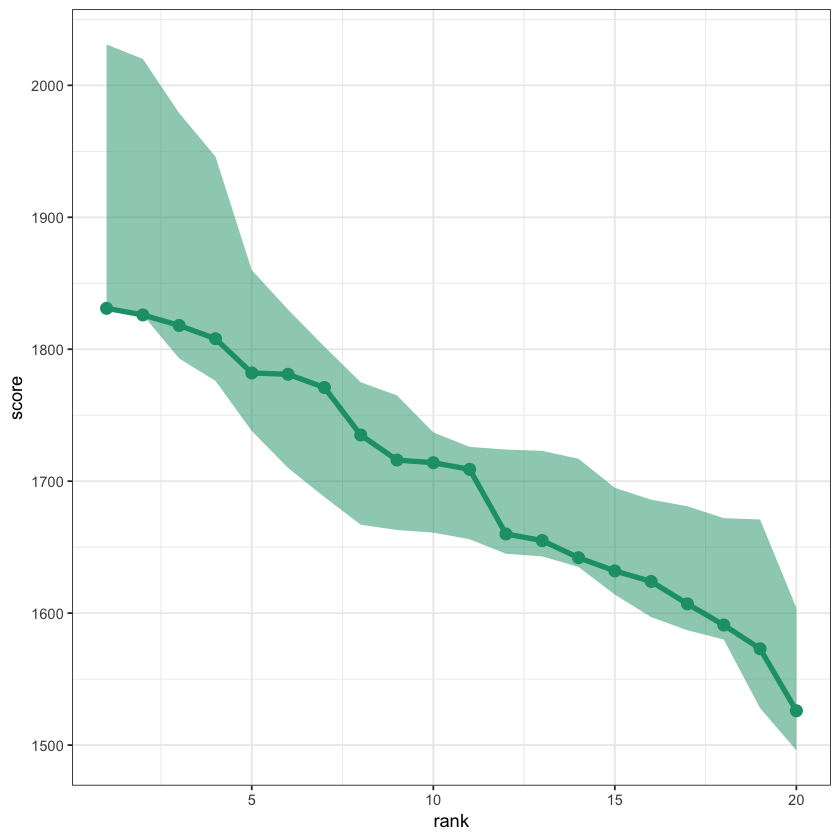

In [14]:
#5
ggplot(oneSeason %>%
         filter(country == 'ENG'),aes(rank,score,col=country)) + 
  geom_ribbon(aes(ymin = atw, ymax = atb, fill=country),col='transparent', alpha=0.5) +
  geom_path(alpha=1, size=1.5) + 
  geom_point(size=3) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="none")


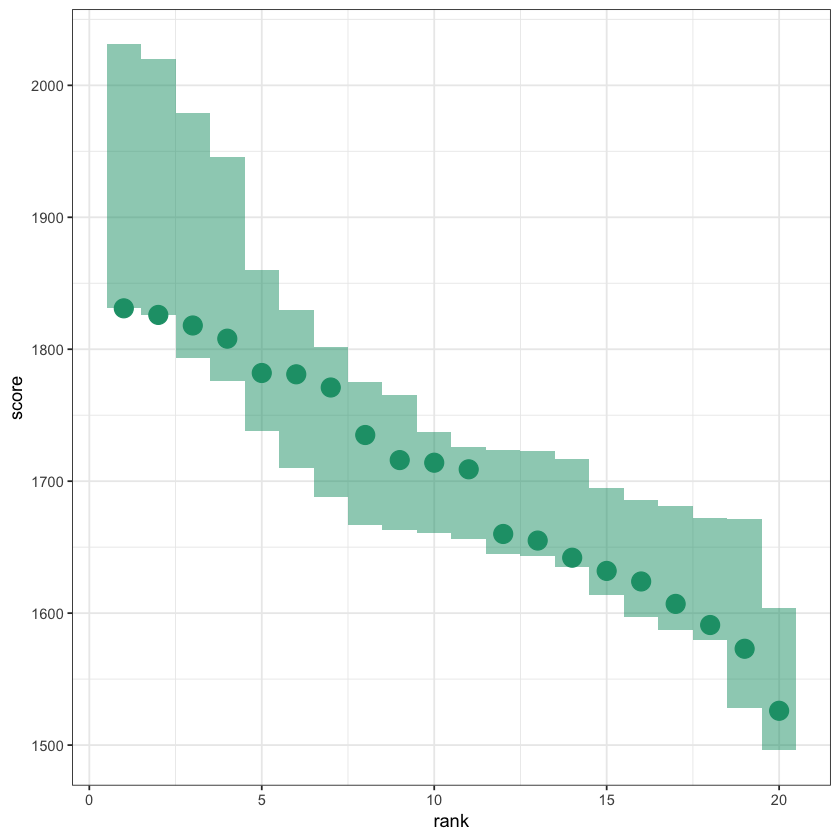

In [15]:
#6
ggplot(oneSeason %>%
         filter(country == 'ENG'),aes(rank,score,col=country, fill=country)) + 
  geom_rect(aes(xmin=rank-0.5, xmax=rank+0.5, ymin = atw, ymax = atb),col='transparent', alpha=0.5) +
  geom_point(size=5) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="none")

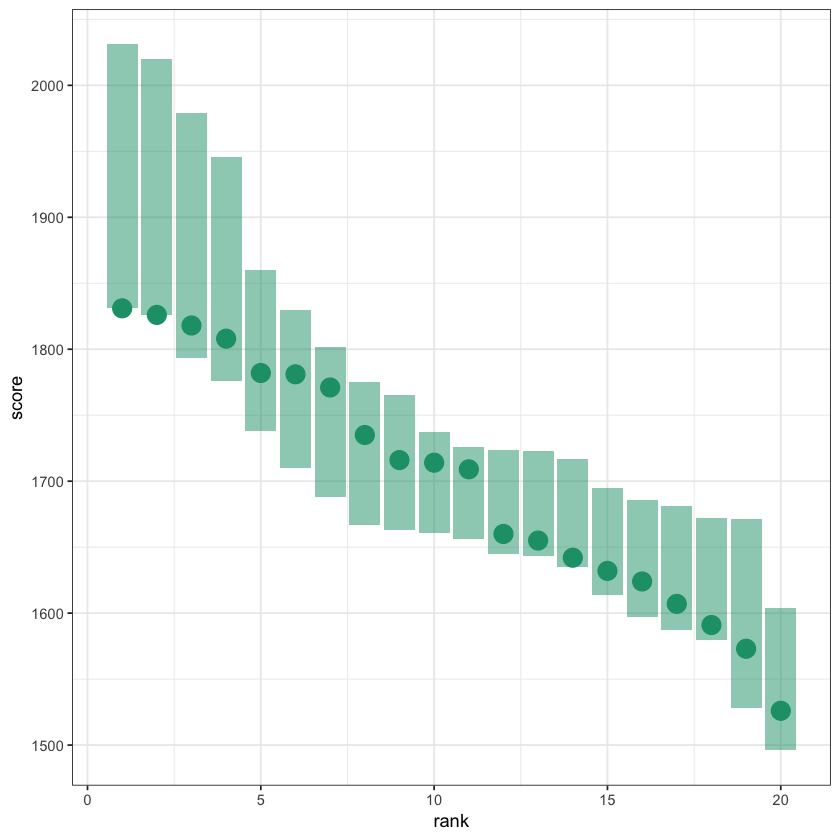

In [16]:
#7
ggplot(oneSeason %>%
         filter(country == 'ENG'),aes(rank,score,col=country, fill=country)) + 
  geom_rect(aes(xmin=rank-0.45, xmax=rank+0.45, ymin = atw, ymax = atb),col='transparent', alpha=0.5) +
  geom_point(size=5) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  theme_bw() +
  theme(legend.position="none")

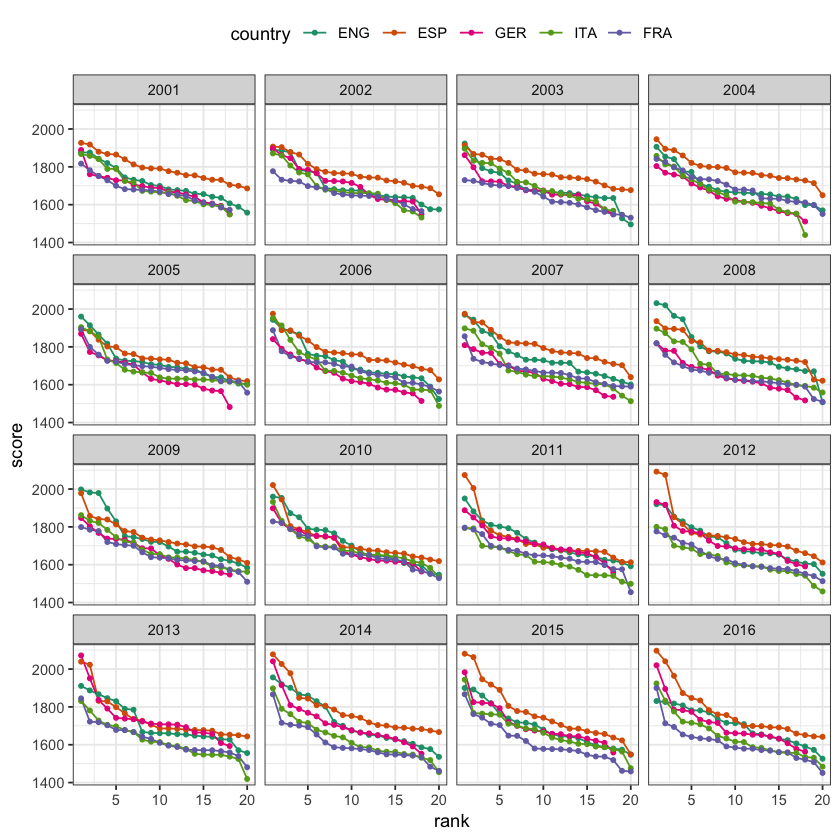

In [17]:
#8
ggplot(allSeasons,aes(rank,score,col=country)) + 
  geom_path() + 
  geom_point(size=1) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  facet_wrap(~year, ncol=4) + 
  theme_bw() +
  theme(legend.position="top")

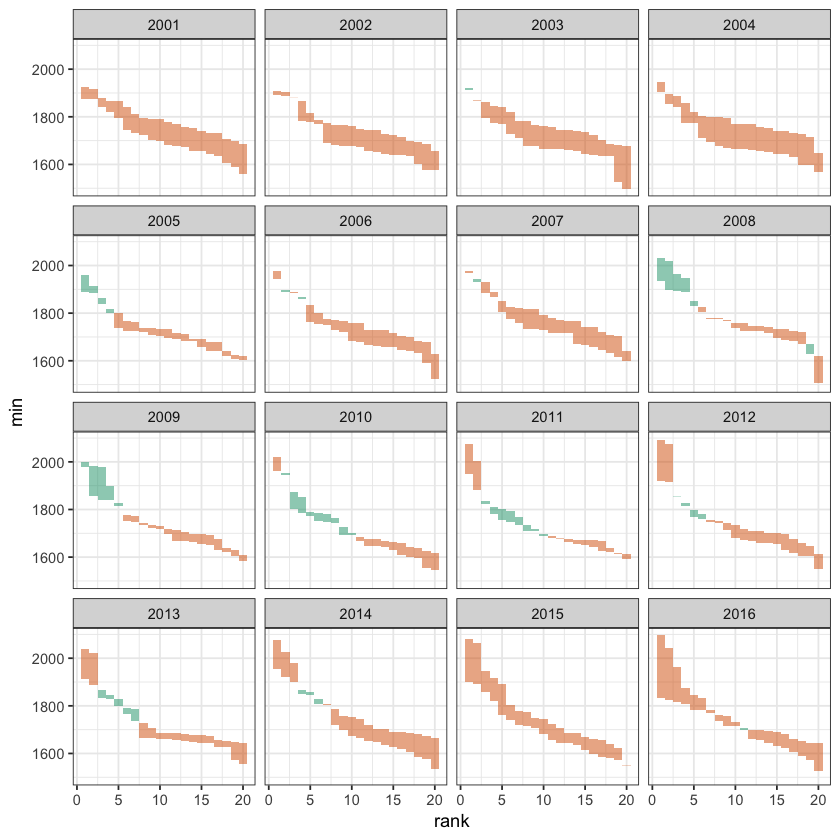

In [18]:
#9
ggplot(allSeasons %>%
         filter(country %in% c('ENG','ESP')) %>%
         dplyr::select(score, year, rank, country) %>% 
         spread(., country, score) %>% 
         rowwise() %>%
         mutate(
           gap = ESP-ENG,
           max = max(ESP,ENG),
           min = min(ESP,ENG)
         )
       ,aes(rank,min,fill=gap>0)) + 
  geom_rect(aes(xmin = rank-0.5, xmax=rank+0.5, ymin=min, ymax=max), alpha=0.5) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  facet_wrap(~year, ncol=4) + 
  theme_bw() +
  theme(legend.position="none")

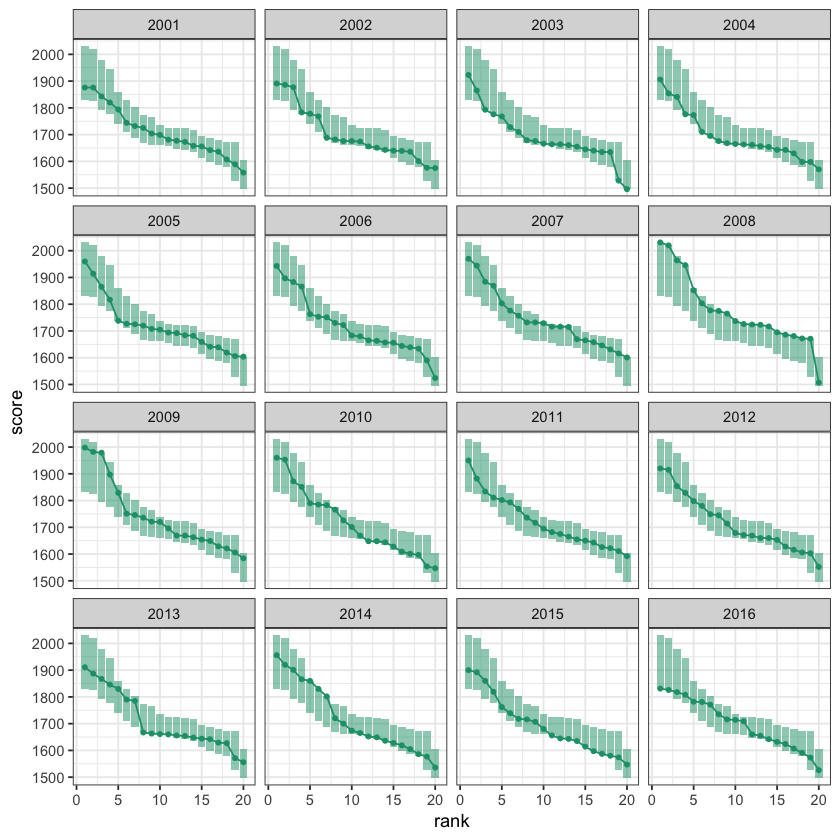

In [19]:
#10
ggplot(allSeasons %>% filter(country == 'ENG'),aes(rank,score,col=country, fill=country)) + 
  geom_rect(aes(xmin=rank-0.45, xmax=rank+0.45, ymin = atw, ymax = atb),col='transparent', alpha=0.5) +
  geom_path(alpha=1) + 
  geom_point(size=1) + 
  scale_color_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  scale_fill_manual(breaks=unique(allSeasons$country),values=brewer_pal('qual',2)(7)) +
  facet_wrap(~year, ncol=4) + 
  theme_bw() +
  theme(legend.position="none")